# PreTrained

In [1]:
from tensorflow import keras

In [2]:
vgg16_1 = keras.applications.VGG16(weights='imagenet', 
                                   include_top=False,
                                   input_shape=(224,224,3))

In [3]:
vgg16_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# 출력층이 Dense 레이어
vgg16_2 = keras.applications.VGG16(weights='imagenet', 
                                   include_top=True,
                                   input_shape=(224,224,3))

In [5]:
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**pydotprint를 사용하려면 graphviz와 pydot 설치 필요**

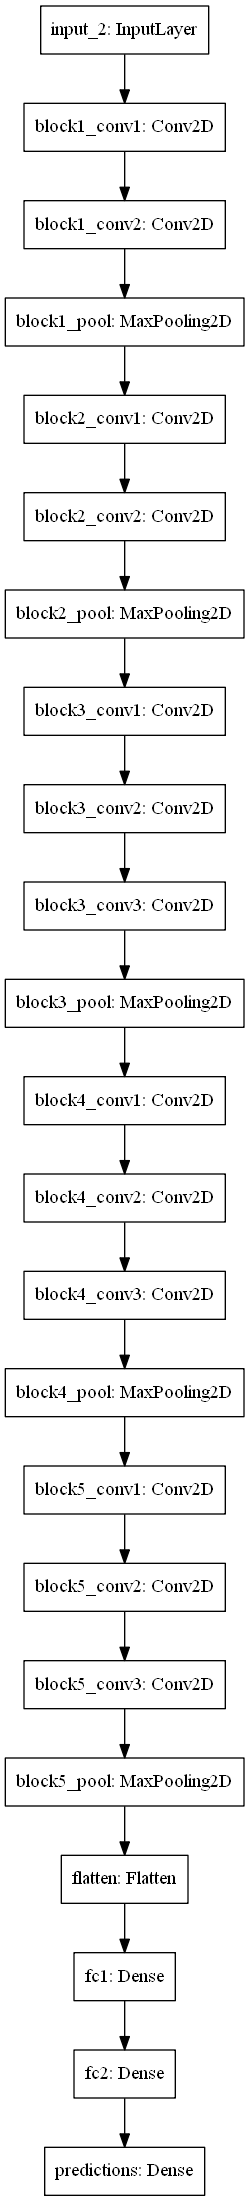

In [9]:
# import tensorflow.keras
# tensorflow.keras.utils.plot_model(vgg16_2)

from tensorflow import keras
keras.utils.plot_model(vgg16_2)

In [7]:
resnet50 = applications.ResNet50V2(include_top=False, input_shape=(224,224,3))

94674944/94668760 [==============================] - 6s 0us/step


In [8]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

#### classfication with pretrained model named 'VGG16'  

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np

In [11]:
# default : (weights='imagenet', include_top=True, input_shape=(224,224,3))
vgg16 = keras.applications.VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
# img_path = 'test_img/car.jpg'
img_path = 'test_img/bicycle.jpg'

img = load_img(img_path, target_size=(224, 224))
img_np = img_to_array(img)
img_np.shape

ERROR! Session/line number was not unique in database. History logging moved to new session 269


(224, 224, 3)

In [27]:
np.min(img_np), np.max(img_np)

(0.0, 255.0)

In [28]:
# 전처리도 모듈 내 함수(; preprocess_input)로 제공해 줌 
input_tensor = keras.applications.vgg16.preprocess_input(img_np)
input_tensor.shape

(224, 224, 3)

In [29]:
np.min(input_tensor), np.max(input_tensor)

(-123.68, 151.061)

In [30]:
pred = vgg16.predict(input_tensor[np.newaxis, ...])

In [31]:
from keras.applications.imagenet_utils import decode_predictions

label = np.argmax(pred, axis=-1)
label_class = decode_predictions(pred, top=3)

print("label num:", label[0])
for idx, lc in enumerate(label_class[0], start=1):
    print(f'{idx}. {lc[1]} ({lc[2]})')

label num: 671
1. mountain_bike (0.9594511389732361)
2. unicycle (0.015243805944919586)
3. crash_helmet (0.007174015045166016)


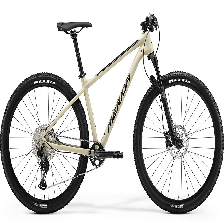

In [32]:
img

# Transfer learning

## 데이터 다운

In [33]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU',
                                    dest_path='./data/cats_and_dogs_small.zip',
                                    unzip=True)

## import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

## 파라미터

In [2]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

## Util함수 정의

### 추론함수

In [24]:
def predict_cat_dog(img_path, model, preprocess_input):
    """
    이미지를 받아서 모델을 이용해 추론 후 결과를 반환하는 함수
    [파라미터]
        img_path: str - 분류(추론)할 이미지 경로
        model: 학습된 모델 객체
        preprocess_input: 이미지 전처리 함수
    [반환값]
        tuple: (예측확률, 예측라벨 index, 예측라벨명)
    """
    class_names = ['Cat', 'Dog']
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_np = img_to_array(img)
    img_np = img_np[np.newaxis, ...]
    
    input_tensor = preprocess_input(img_np)
        
    pred = model.predict(input_tensor)[0][0]
    pred_class = int(np.where(pred<=0.5, 0, 1))
    pred_label = class_names[pred_class]
    
    return pred, pred_class, pred_label

ERROR! Session/line number was not unique in database. History logging moved to new session 290


### ImageDataGenerator 

In [25]:
def get_generator(preprocess_input):
    """
    train/validation/test 용 ImageDataGenerator 생성해서 반환하는 함수
    [파라미터]
        preprocess_input: 전처리 함수
    [반환값]
        tuple: (train iter, validation iter, test iter)
    """
    train_dir = "data/train/"
    val_dir = 'data/validation/'
    test_dir = 'data/test'
    
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                       rotation_range=40, 
                                       brightness_range=[0.7, 1.3], 
                                       zoom_range=0.2, 
                                       horizontal_flip=True, 
                                       width_shift_range=0.2, 
                                       height_shift_range=0.2, 
                                       fill_mode='constant')
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    
    train_iter = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    val_iter = val_datagen.flow_from_directory(val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    test_iter = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    
    return train_iter, val_iter, test_iter

## 데이터셋 로드

In [26]:
train_iter, val_iter, test_iter = get_generator(keras.applications.vgg16.preprocess_input)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
def create_model1(backbone):
    """
    Feature Exctractor 모델을 받아서 개/고양이 분류 모델을 만들어 반환
    [Parameter]
        backbone: Feature Exctractor
    [Return]
        model
    """
    model = keras.Sequential()
    
    # Frozen; weights(parameter) of layers what compose backbone arn't updated while model fit 
    backbone.trainable = False # must do before compile     
    
    model.add(backbone)
    
    model.add(layers.GlobalAveragePooling2D()) # use GAP instead of 'Flatten()'
    model.add(layers.Dense(units=1, activation='sigmoid'))
    
    return model

In [7]:
backbone = applications.VGG16(include_top=False, 
                              input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

model1 = create_model1(backbone)

model1.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


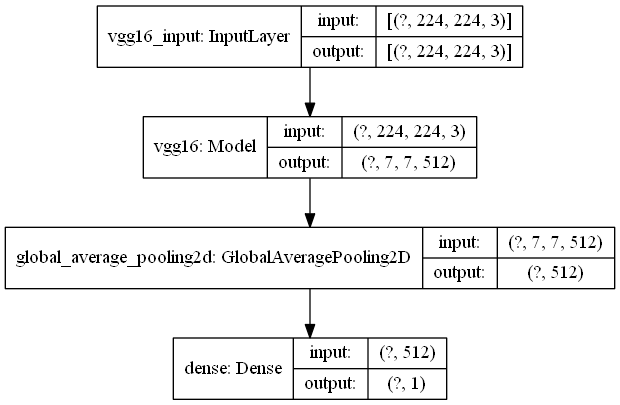

In [9]:
keras.utils.plot_model(model1, show_shapes=True)

In [10]:
with tf.device('/gpu:0'):
    hist = model1.fit(train_iter, epochs=N_EPOCHS, 
                       steps_per_epoch=len(train_iter), 
                       validation_data=val_iter,
                       validation_steps=len(val_iter))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/20
20/20 [==============================] - 34s 2s/step - loss: 1.3315 - accuracy: 0.6195 - val_loss: 1.1406 - val_accuracy: 0.6980
Epoch 2/20
20/20 [==============================] - 27s 1s/step - loss: 0.6029 - accuracy: 0.8045 - val_loss: 0.4737 - val_accuracy: 0.8530
Epoch 3/20
20/20 [==============================] - 26s 1s/step - loss: 0.3709 - accuracy: 0.8770 - val_loss: 0.3794 - val_accuracy: 0.8830
Epoch 4/20
20/20 [==============================] - 26s 1s/step - loss: 0.2897 - accuracy: 0.8960 - val_loss: 0.2656 - val_accuracy: 0.9200
Epoch 5/20
20/20 [==============================] - 26s 1s/step - loss: 0.2535 - accuracy: 0.9020 - val_loss: 0.2170 - val_accuracy: 0.9330
Epoch 6/20
20/20 [==============================] - 26s 1s/step - loss: 0.1945 - accuracy: 0.9290 - val_loss: 0.2184 - val_accuracy: 0.9360
Epoch 7/20
20/20 [==============================] - 26s 1s/step - lo

### 트러블 슈팅
**※ GPU 사용시 OoM 문제 해결**

1. !nvidia-smi 명령어를 통해 현재 사용 중인 GPU 메모리 확인
2. 불필요한 프로그램 및 창들 종료 후 커널 리스타트.
3. 재실행 후에도 안될 경우
    - with tf.device(): 를 통해 사용할 디바이스 강제 지정
    - 현재 컴퓨터에 사용가능한 디바이스는 '/cpu:0', '/gpu:0' 두가지 뿐.
    - 현재 컴퓨터의 환경은 gtx1650으로 메모리가 4gb뿐이라 쉽게 OoM메세지 출력
    - 따라서 속도는 느리지만 cpu 사용해서 해결
    - 번외) 코랩의 경우 gpu 사용시 메모리 약 11gb 제공

In [11]:
model1.evaluate(test_iter)

  ...
    to  
  ['...']
10/10 [==============================] - 8s 816ms/step - loss: 0.1083 - accuracy: 0.9770


[0.10832990482449531, 0.977]

In [12]:
predict_cat_dog('./test_img/cat.jpg', model1, applications.vgg16.preprocess_input) 

ERROR! Session/line number was not unique in database. History logging moved to new session 283


(2.305285e-13, 0, 'Cat')

In [13]:
predict_cat_dog('./test_img/dog.jpg', model1, applications.vgg16.preprocess_input)

(1.0, 1, 'Dog')

# fine tuning

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

test_model = keras.Sequential()
test_model.add(layers.Conv2D(filters=32, kernel_size=3,  padding='same', activation='relu', input_shape=(28,28,1)))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Flatten())
test_model.add(layers.Dense(units=128, activation='relu'))
test_model.add(layers.Dense(units=1, activation='sigmoid', name='output'))


In [3]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
output (Dense)               (None, 1)                 1

In [4]:
test_layers = test_model.layers
print(type(test_layers), len(test_layers))

<class 'list'> 7


In [5]:
test_layers[0], test_layers[1], test_layers[6], test_layers[4]

(<tensorflow.python.keras.layers.convolutional.Conv2D at 0x23bcf565d88>,
 <tensorflow.python.keras.layers.core.Flatten at 0x23bd68aaa88>)

In [6]:
test_layers[0].name, test_layers[6].name

('conv2d', 'output')

In [7]:
output_layer = test_model.get_layer("output")
output_layer

In [8]:
conv_layer_1 = test_model.get_layer('conv2d')
conv_layer_1

In [9]:
max_pooling2d_1 = test_model.get_layer('max_pooling2d_1')
max_pooling2d_1

In [10]:
model_params = test_model.weights
type(model_params), len(model_params)

(list, 8)

In [11]:
param = conv_layer_1.weights

type(param), len(param) 

(list, 2)

In [12]:
# weight
param[0].shape 

TensorShape([3, 3, 1, 32])

In [13]:
# bias
param[1].shape 

TensorShape([32])

In [14]:
# pooling은 weights가 없음.
max_pooling2d_1.weights

[]

In [15]:
print(conv_layer_1.trainable)
conv_layer_1.trainable = False
print(conv_layer_1.trainable) 

True
False


In [16]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
output (Dense)               (None, 1)                 1

# fine tuning example

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

In [18]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

In [19]:
def create_model2():
    """
    VGG16에서 block5_conv2, block5_conv3 은 학습 가능하도록 fine tuning을 한다.
    """
    model = keras.Sequential()
    conv_base = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    is_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv2':
            is_trainable = True
        layer.trainable = is_trainable
    
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

In [20]:
model2 = create_model2()
model2.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 14,846,273
Trainable params: 4,851,201
Non-trainable params: 9,995,072
_________________________________________________________________


In [22]:
save_path = 'path'

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_path, 
                                              save_best_only=True, 
                                              monitor='val_loss', 
                                              verbose=2)

In [30]:
hist = model2.fit(train_iter, epochs=N_EPOCHS, steps_per_epoch=len(train_iter), validation_data=val_iter, validation_steps=len(val_iter), callbacks=[mc_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 20 steps, validate for 10 steps
Epoch 1/20
19/20 [===========================>..] - ETA: 0s - loss: 0.0574 - accuracy: 0.9784
Epoch 00001: val_loss did not improve from 0.11412
20/20 [==============================] - 27s 1s/step - loss: 0.0556 - accuracy: 0.9795 - val_loss: 0.1551 - val_accuracy: 0.9610
Epoch 2/20
19/20 [===========================>..] - ETA: 0s - loss: 0.0320 - accuracy: 0.9868
Epoch 00002: val_loss did not improve from 0.11412
20/20 [==============================] - 27s 1s/step - loss: 0.0312 - accuracy: 0.9875 - val_loss: 0.1492 - val_accuracy: 0.9710
Epoch 3/20
19/20 [===========================>..] - ETA: 0s - loss: 0.0510 - accuracy: 0.9789
Epoch 00003: val_loss did not improve from 0.11412
20/20 [==============================] - 27s 1s/step - loss: 0.0495 - accuracy: 0.9795 - val_loss: 0.2759 - val_accuracy: 0.9440
Epoch 4/20
19/20 [===========================>..] - ETA: 0s - loss: 0.0613 - accuracy: 0.9774
Epoch 00004: val_loss did not improve from

### 트러블 슈팅
**WARNING: AutoGraph could not transform <function canonicalize_signatures \<locals>.signature_wrapper at 0x0000023C87746798> and will run it as-is.**

- 해당 오류로 실행이 안되거나 결과에 이상이 생기진 않았지만 학습과정에서 계속해서 경고 문구가 떠서 이유를 찾아봄
1.  tensorflow 2.0대로 넘어오면서 keras와 AutoGraph의 버전 충돌 때문에 발생한다는 글을 발견 
    - 해결 방안으로 gast를 설치할 것을 제시 
    - 하지만 이미 설치되어있음에도 해당 에러 메세지가 출력되었기에 기각.
2. @tf.function 데코레이터 사용시에도 같은 오류가 발생한다는 글 발견
    - 해당 블로그에서 발견한 원인은 백슬레시(\) 문자 사용 때문
    - 실제로 코드 파라미터를 줄바꿈없이 한줄로 작성하자 더이상 에러코드 출력 x

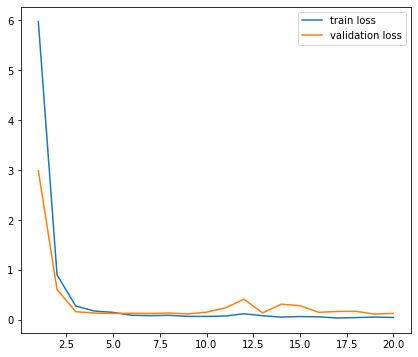

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')

plt.legend()
plt.show()

In [29]:
model2.evaluate(test_iter)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


10/10 [==============================] - 8s 818ms/step - loss: 0.1101 - accuracy: 0.9730


[0.11005680076777935, 0.973]